In [1]:
'''
HHL - Quantum algorithm for the linear systems
'''

'\nHHL - Quantum algorithm for the linear systems\n'

In [2]:
# Useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import BasicAer, execute
from qiskit.quantum_info import Pauli, state_fidelity, basis_state, process_fidelity 
from qiskit.tools.visualization import plot_histogram

from qiskit import *
IBMQ.load_accounts(hub=None)
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview
from qiskit.providers.ibmq import least_busy

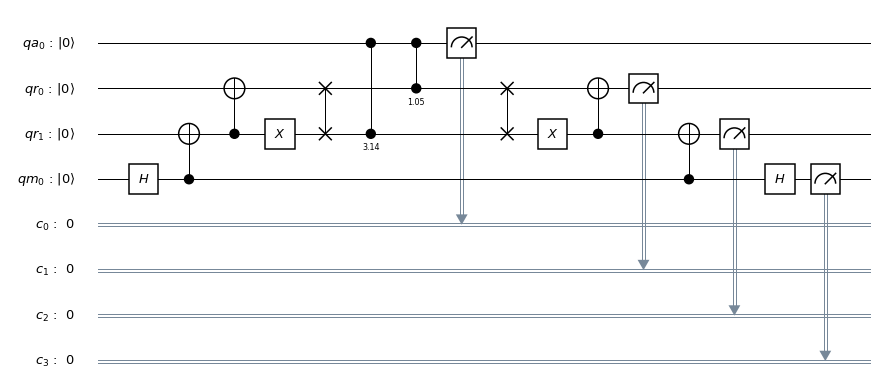

In [9]:
qa = QuantumRegister(1, 'qa') # ancilla register
qr = QuantumRegister(2, 'qr') # register register
qm = QuantumRegister(1, 'qm') # memory register
c = ClassicalRegister(4, 'c')

circ = QuantumCircuit()
circ.add_register(qa)
circ.add_register(qr)
circ.add_register(qm)
circ.add_register(c)


#Phase estimation
circ.h(qm[0])
circ.cx(qm[0],qr[1])
circ.cx(qr[1],qr[0])
circ.x(qr[1])
circ.swap(qr[0], qr[1])

#Controlled rotation
circ.cu1(pi,qr[1],qa[0])
circ.cu1(pi/3,qr[0],qa[0])

#Inverse phase estimation
circ.swap(qr[0], qr[1])
circ.x(qr[1])
circ.cx(qr[1],qr[0])
circ.cx(qm[0],qr[1])
circ.h(qm[0])

#measure
#circ.x(qa[0])
#circ.x(qr[0])
#circ.x(qr[1])
#circ.x(qm[0])

circ.measure(qa[0], c[0])
circ.measure(qr[0], c[1])
circ.measure(qr[1], c[2])
circ.measure(qm[0], c[3])

circ.draw(output='mpl')

{'1111': 1024}


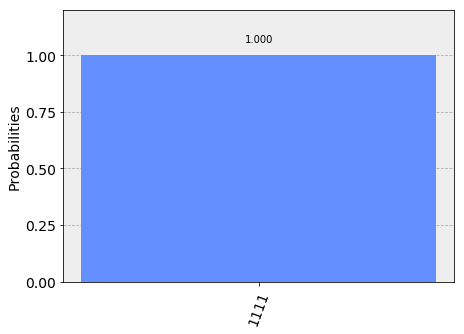

In [8]:
backend_sim = BasicAer.get_backend('qasm_simulator')
result = execute(circ, backend_sim).result()
counts = result.get_counts(circ)
print(counts)

plot_histogram(counts)